<a href="https://colab.research.google.com/github/ashishshaji/Natural_language_processing_projects/blob/master/Fake%20news/lstm_with_glove_nlp_fake_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAKE NEWS CLASSIFICATION USING DEEP LEARNING WITH GloVe


In this notebook i have tried to classify news into 2 classes real and fake using LSTM nueral network .

![](https://cdn.factcheck.org/UploadedFiles/fakenews.jpg)
I have used pretrained Glove for vectorization and able to achive an accuracy of 99% by the proposed LSTM model.


## Dataset
The dataset consists of about 40000 articles consisting around equal number of fake as well as real news Most of the news where collected from U.S newspapers and contian news about american poltics,world news ,news etc.

# Loading the dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
""
%matplotlib inline
sns.set_style("darkgrid")

In [ ]:
true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

* Finding the most used words in fake and real news using Word cloud

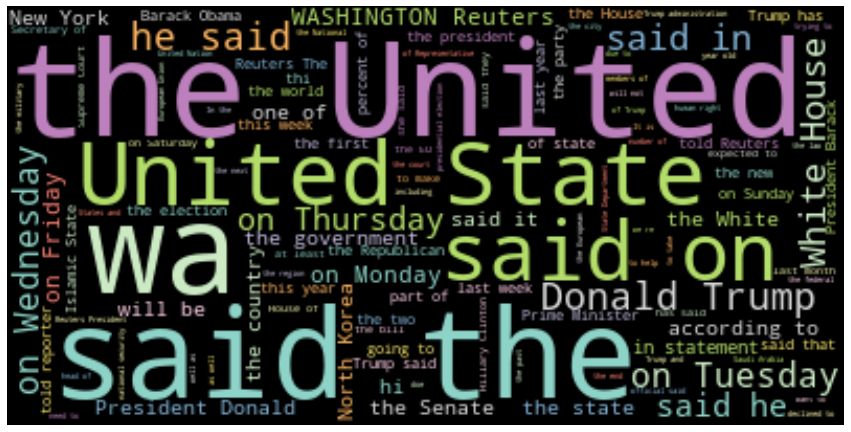

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in true.text.unique())
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

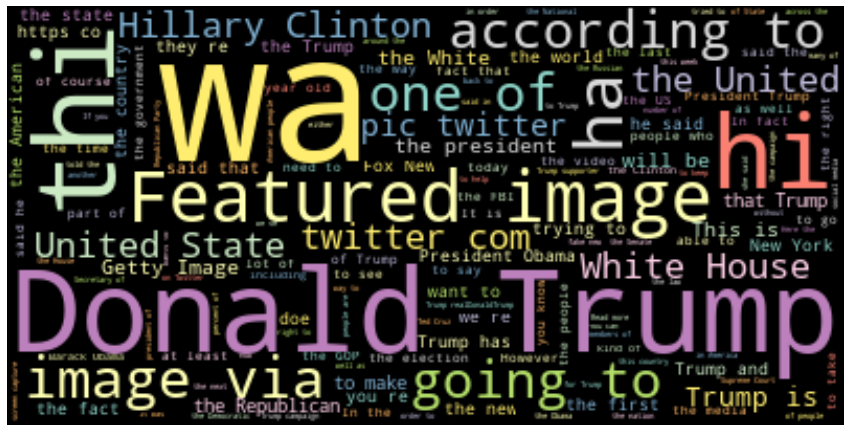

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in false.text.unique())
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

* labeling the fake news as 0 and real news as 1

In [ ]:
true['label'] = 1
false['label'] = 0

* Merging the 2 datasets

In [ ]:
news = pd.concat([true,false]) 
news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
news['text'] = news['text'] + " " + news['title']
news

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
df=news.drop(["date","title","subject"],axis=1)

In [ ]:
df

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


* containing  23481 fake news and 21417 non fake news

In [ ]:
print(false.shape)
print(true.shape)


(23481, 5)
(21417, 5)


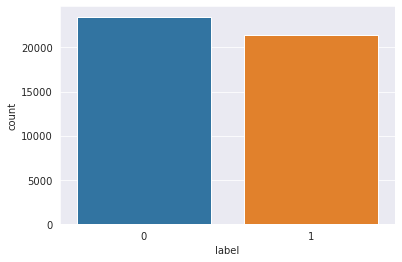

In [ ]:
sns.countplot(x="label", data=news);
plt.show()

# data Preproccessing
We have to convert the raw messages (sequence of characters) into vectors (sequences of numbers).before that we need to do the following:
1. Remove punctuation
2. Remove numbers
3. Remove tags
4. Remove urls
5. Remove stepwords
6. Change the news to lower case
7. Lemmatisation 

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
import re

The following 4 functions will help as to remove punctions (<,.'':, etc),numbers,tags and urls

In [ ]:
def rem_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

def rem_numbers(text):
  return re.sub('[0-9]+','',text)


def rem_urls(text):
  return re.sub('https?:\S+','',text)


def rem_tags(text):
  return re.sub('<.*?>'," ",text)


In [ ]:
df['text'].apply(rem_urls)
df['text'].apply(rem_punctuation)
df['text'].apply(rem_tags)
df['text'].apply(rem_numbers)


0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    st Century Wire says As WIRE reported earlier ...
23477    st Century Wire says It s a familiar theme. Wh...
23478    Patrick Henningsen  st Century WireRemember wh...
23479    st Century Wire says Al Jazeera America will g...
23480    st Century Wire says As WIRE predicted in its ...
Name: text, Length: 44898, dtype: object

rem_stopwords() is the function for removing stopwords and for converting the words to lower case

In [ ]:
stop = set(stopwords.words('english'))

def rem_stopwords(df_news):
    
    words = [ch for ch in df_news if ch not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in df_news.split()]
    
    return words    

In [ ]:
df['text'].apply(rem_stopwords)


0        [washington, (reuters), -, the, head, of, a, c...
1        [washington, (reuters), -, transgender, people...
2        [washington, (reuters), -, the, special, couns...
3        [washington, (reuters), -, trump, campaign, ad...
4        [seattle/washington, (reuters), -, president, ...
                               ...                        
23476    [21st, century, wire, says, as, 21wire, report...
23477    [21st, century, wire, says, it, s, a, familiar...
23478    [patrick, henningsen, 21st, century, wireremem...
23479    [21st, century, wire, says, al, jazeera, ameri...
23480    [21st, century, wire, says, as, 21wire, predic...
Name: text, Length: 44898, dtype: object

* **Lemmatization** 
performs vocabulary and morphological analysis of the word and is normally aimed at removing **inflectional endings** only.That isconvert the words to their base or root form eg in "plays" it is converted to "play" by removing "s"

In [ ]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  lemmas = []
  for word in text.split():
    lemmas.append(lemmatizer.lemmatize(word))
  return " ".join(lemmas)

In [ ]:
df['text'].apply(lemmatize_words)


0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire say As 21WIRE reported earli...
23477    21st Century Wire say It s a familiar theme. W...
23478    Patrick Henningsen 21st Century WireRemember w...
23479    21st Century Wire say Al Jazeera America will ...
23480    21st Century Wire say As 21WIRE predicted in i...
Name: text, Length: 44898, dtype: object

# Tokenizing & Padding

* **Tokenizing**
is the process of breaking down a text into words. Tokenization can happen on any character, however the most common way of tokenization is to do it on space character.

* **Padding**
Naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, for this we use padding

In [ ]:
from keras.preprocessing.text import Tokenizer

from keras.utils import to_categorical


Using TensorFlow backend.


In [ ]:
x = df['text'].values
y= df['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_to_index = tokenizer.word_index
x = tokenizer.texts_to_sequences(x)

In [ ]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 100

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x = pad_sequences(x, maxlen=max_length)

# Vectorization
 Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers 
 There are many  method for doing vectorization including  Bag of words,TFIDF or prettrained method such as Word2Vec ,Glove etc
 
 we are using **GloVe** learning algorithm for obtaining vector representations for words devolped by Stanford
 

In [ ]:
embeddings_index = {};
with open('../input/glove6b100dtxt/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

   
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          14770900  
_________________________________________________________________
lstm (LSTM)                  (None, 250, 64)           42240     
_________________________________________________________________
dropout (Dropout)            (None, 250, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [ ]:
epochs = 10
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10
281/281 [==============================] - 126s 449ms/step - loss: 0.1847 - accuracy: 0.9293 - val_loss: 0.1346 - val_accuracy: 0.9452
Epoch 2/10
281/281 [==============================] - 122s 432ms/step - loss: 0.0685 - accuracy: 0.9765 - val_loss: 0.0452 - val_accuracy: 0.9836
Epoch 3/10
281/281 [==============================] - 122s 433ms/step - loss: 0.0402 - accuracy: 0.9868 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 4/10
281/281 [==============================] - 128s 455ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 5/10
281/281 [==============================] - 121s 432ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0291 - val_accuracy: 0.9918
Epoch 6/10
281/281 [==============================] - 121s 432ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0221 - val_accuracy: 0.9940
Epoch 7/10
281/281 [==============================] - 123s 439ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0223 -

In [ ]:
result = model.evaluate(X_test, y_test)
# extract those
loss = result[0]
accuracy = result[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")

281/281 [==============================] - 19s 66ms/step - loss: 0.0203 - accuracy: 0.9951
[+] Accuracy: 99.51%
